### 

# <center> Normality Test and Data Transformations

___

The normality of data is one of the central aspects in statistics and consequently in data science. Many algorithms and statistical inferences assume the normality of data, therefore, we must test it and whenever possible apply the necessary transformations to seek normalization of the data.

The operations will be performed using scikit-learn, scipy, and numpy.

___

## Imports

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from scipy import stats

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

___

## Data

In [2]:
# Load data
arquivo = 'dados/datasetalcool.csv'

df = pd.read_csv(arquivo, encoding = 'UTF-8')

In [3]:
# View
df

,idade,sexo,tot_bilirubin,direct_bilirubin,tot_proteins,albumina,ag_ratio,sgpt,sgot,alkphos,classe
0,65,Mulher,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Homem,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Homem,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Homem,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Homem,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Homem,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Homem,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Homem,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Homem,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
# Numeric features
dataset = df[['idade', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumina', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']]

# View
dataset

,idade,tot_bilirubin,direct_bilirubin,tot_proteins,albumina,ag_ratio,sgpt,sgot,alkphos
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


___

# EDA

A brief exploration and treatment of the data.

In [5]:
# shape
dataset.shape

(583, 9)

In [6]:
# Checkin missing values
dataset.isna().values.any()

True

In [7]:
# view na
dataset.isna().sum()

idade               0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumina            0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
dtype: int64

In [8]:
# Drop na
dataset.dropna(inplace = True)

# Double check missing values
dataset.isna().values.any()

False

In [9]:
# Data format
dataset.dtypes

idade                 int64
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumina              int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
dtype: object

___

# Testing Normality

> ### Statistical test

**Hypotheses:**

    * Null hypothesis: The data follows a normal distribution - p > alpha
    * Alternative hypothesis: The data does not follow a normal distribution - p < alpha.

In [10]:
# test
def normalTest(alpha, dataset):
    alpha = alpha
    names = []
    test = []
    p_value = []
    
    # Null hypothesis: The data follows a normal distribution - p > alpha
    # Alternative hypothesis: The data does not follow a normal distribution - p < alpha.
    
    for col in dataset.columns:
        k2, p = stats.normaltest(dataset[col])
        names.append(col)
        test.append('The Null Hypothesis can be rejected.' if p < alpha else 'The Null Hypothesis cannot be rejected.')
        p_value.append(p.round(4))
        
    return pd.DataFrame({'Name': names,
                         'Test': test,
                         'p-value': p_value})

In [11]:
normalTest(0.05 , dataset)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0005
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0000
4,albumina,The Null Hypothesis can be rejected.,0.0000
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis can be rejected.,0.0088
7,sgot,The Null Hypothesis cannot be rejected.,0.0589
8,alkphos,The Null Hypothesis can be rejected.,0.0000


> ### Visual test

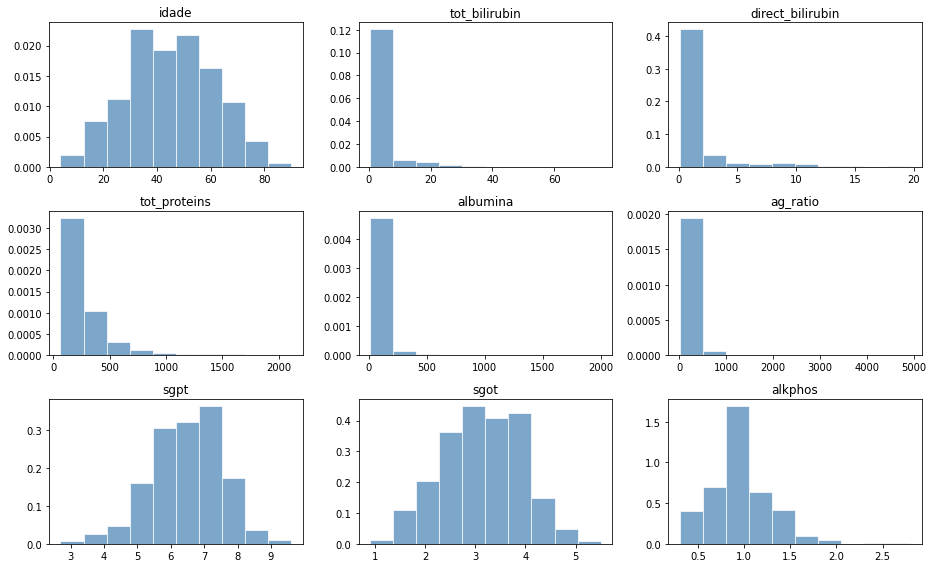

In [12]:
# Density Plot 
dataset.hist(grid = False, layout = (3,3), figsize = (13, 8), density = True, color = 'steelblue', alpha=0.7, ec = 'white')

plt.tight_layout()
plt.show()

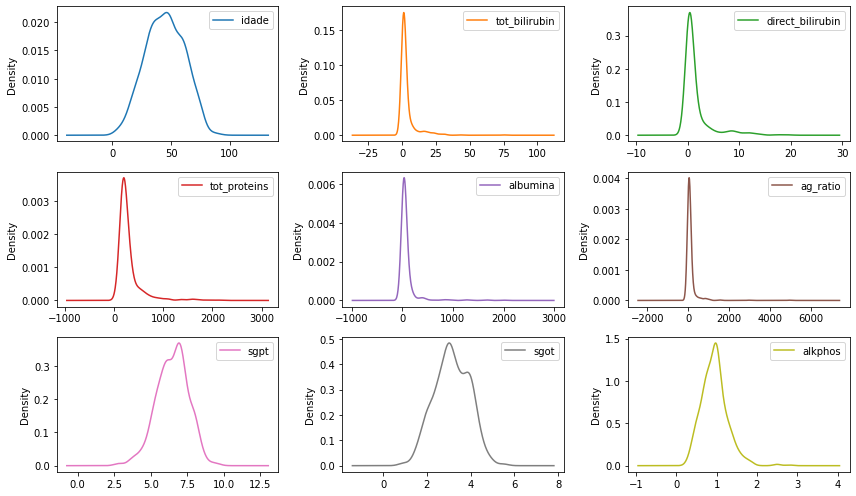

In [13]:
# Density Plot 
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (12,7))

plt.tight_layout()
plt.show()

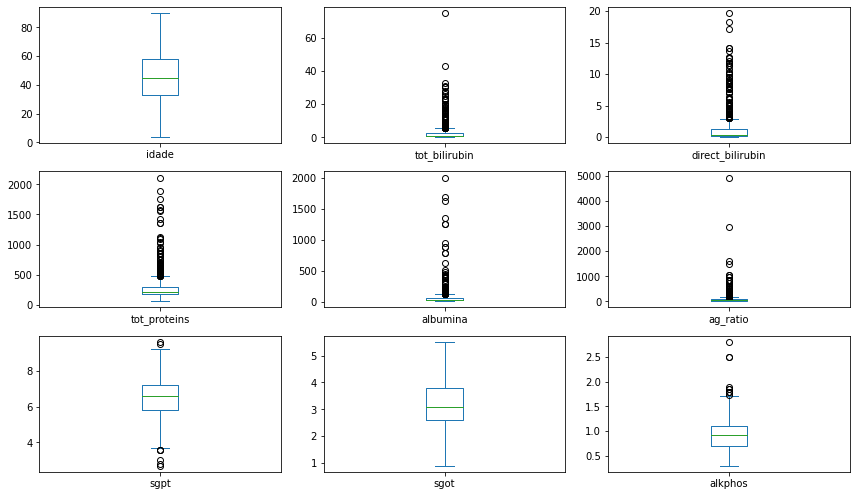

In [14]:
# Box Plots
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (12,7))

plt.tight_layout()
plt.show()

___

# Transformations and testing

Firstly, we will apply transformations only to the tot_proteins variable and test the normality in each case. Later, we will repeat the procedure on the entire dataset.

In [15]:
# set datasets
normal_df = dataset[['tot_proteins']]

### Normalization  - Method 1

In [16]:
# Scaling data to same scale between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

# Scaling
scaler = MinMaxScaler(feature_range = (0, 1))
rescaled = scaler.fit_transform(normal_df)

# Create new dataframe
rescaled_df = pd.DataFrame(rescaled, columns = ['rescaled'])

### Normalization - Methd 2

In [17]:
# Scaling data to length equal to 1
from sklearn.preprocessing import Normalizer

# Scaling
scaler = Normalizer(norm = 'l2').fit(normal_df)
normalized = scaler.transform(normal_df)

# Create new dataframe
normalized_df = pd.DataFrame(normalized, columns = ['normalized'])

### Standardization

In [18]:
# Mean 0 and standard deviation 1 
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler().fit(normal_df)
standard = scaler.transform(normal_df)

# Create new dataframe
standard_df = pd.DataFrame(standard, columns = ['standard'])

In [19]:
# df com scaling
df_transf = pd.concat([normal_df, rescaled_df, normalized_df, standard_df], axis = 1).dropna().reset_index(drop = True)
df_transf

,tot_proteins,rescaled,normalized,standard
0,187.0,0.060576,1.0,-0.428870
1,699.0,0.310699,1.0,1.675083
2,490.0,0.208598,1.0,0.816243
3,182.0,0.058134,1.0,-0.449416
4,195.0,0.064485,1.0,-0.395996
...,...,...,...,...
570,515.0,0.213483,1.0,0.857336
571,560.0,0.017098,1.0,-0.794596
572,289.0,0.088911,1.0,-0.190532
573,190.0,0.059111,1.0,-0.441198


> ### Statistical test

In [20]:
normalTest(0.05, df_transf)

,Name,Test,p-value
0,tot_proteins,The Null Hypothesis can be rejected.,0.0
1,rescaled,The Null Hypothesis can be rejected.,0.0
2,normalized,The Null Hypothesis can be rejected.,0.0
3,standard,The Null Hypothesis can be rejected.,0.0


> ### Visual test

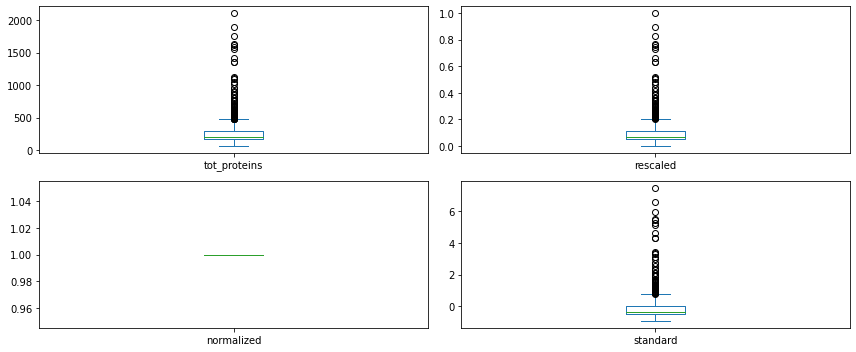

In [21]:
# Box Plots
df_transf.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (12,5))

plt.tight_layout()
plt.show()

As it can be observed, standardization and normalization do not change the distribution of the data. However, these transformations are useful in other aspects, such as in the application of algorithms that use distance measures, such as K-means or KNN.

To modify the distribution of the data, we need to apply other transformations.

___

# Transformations that influence the distribution of the data

Let's apply the following transformations:

* Log
* Square-Root
* Reciprocal
* Box-Cox 
* Yeo-Johnson

### Define functions

In [22]:
import numpy as np

# Log Transformation
def logFunc(df):
    return np.log1p(df)

# Square-Root Transformation
def sqrtFunc(df):
    return pd.DataFrame(df**(1/2))

# Reciprocal Transformation
def reciprocalFunc(df):
    return 1/df

# Box-Cox Transformation
from scipy.stats import boxcox
def bxcFunc(df):
    bcx = [boxcox(df[col])[0] for col in df.columns]
    bcx = pd.DataFrame(bcx).T
    bcx.columns = list(df.columns)
    return bcx

# Yeo-Johnson Transformation
from scipy.stats import yeojohnson
def yeoJohnFunc(df):
    yf = [yeojohnson(df[col])[0] for col in df.columns]
    yf = pd.DataFrame(yf).T
    yf.columns = list(df.columns)
    return yf

Let's apply them to the variable tot_proteins.

In [23]:
# Set df
df_test2 =  dataset[['tot_proteins']]

In [24]:
import numpy as np

# Log Transformation
log = logFunc(df_test2[['tot_proteins']])

# Square-Root Transformation
sqrt = sqrtFunc((df_test2[['tot_proteins']]**(1/2)))

# Reciprocal Transformation
reciprocal = reciprocalFunc(df_test2[['tot_proteins']])

# Box-Cox Transformation
bcx = bxcFunc(df_test2[['tot_proteins']])

# Yeo-Johnson Transformation
yf = yeoJohnFunc(df_test2[['tot_proteins']])

In [25]:
# Create dataset
df_transf2 = pd.concat([df_test2, log, sqrt, reciprocal, bcx, yf], axis = 1).dropna()

df_transf2.columns = ['Original', 'Log', 'Square-Root', 'Reciprocal', 'Box-Cox', 'Yeo-Johnson']

# View
df_transf2.head()

,Original,Log,Square-Root,Reciprocal,Box-Cox,Yeo-Johnson
0,187.0,5.236442,3.697945,0.005348,1.352033,1.339377
1,699.0,6.551080,5.141849,0.001431,1.371418,1.357828
2,490.0,6.196444,4.704885,0.002041,1.367856,1.354444
3,182.0,5.209486,3.672974,0.005495,1.351408,1.338782
4,195.0,5.278115,3.736876,0.005128,1.352974,1.340273


> ### Statistical test

In [26]:
normalTest(0.05, df_transf2)

,Name,Test,p-value
0,Original,The Null Hypothesis can be rejected.,0.0000
1,Log,The Null Hypothesis can be rejected.,0.0000
2,Square-Root,The Null Hypothesis can be rejected.,0.0000
3,Reciprocal,The Null Hypothesis can be rejected.,0.0000
4,Box-Cox,The Null Hypothesis can be rejected.,0.0007
5,Yeo-Johnson,The Null Hypothesis can be rejected.,0.0008


> ### Visual test

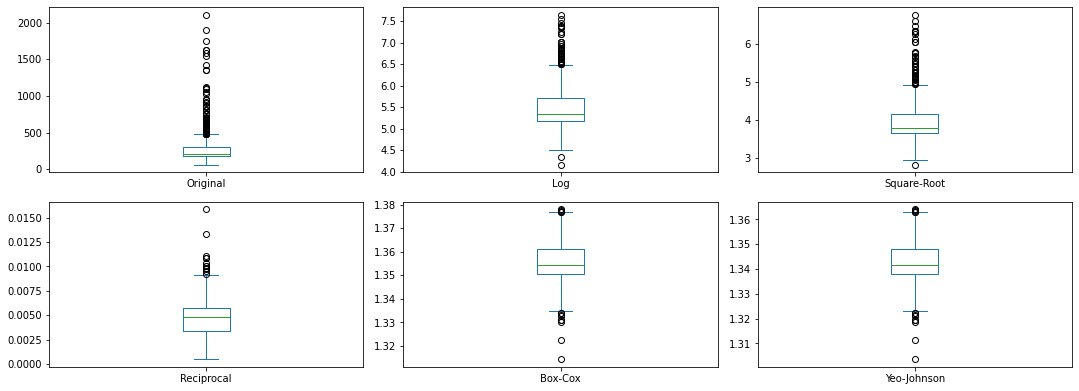

In [27]:
# Box Plots
df_transf2.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,8))

plt.tight_layout()
plt.show()

From a quantitative point of view, the transformations were not sufficient to normalize the distributions. However, it is possible to observe that with the transformations, the distribution approaches normality.

___

# Apply the transformations to all variables

**Hypothesis:**

    * Null hypothesis: The data follows a normal distribution - p > alpha
    * Alternative hypothesis: The data does not follow a normal distribution - p < alpha.    

### Log

In [28]:
# transform
log = logFunc(dataset)

#test
normalTest(0.05, log)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0000
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0000
4,albumina,The Null Hypothesis can be rejected.,0.0000
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis can be rejected.,0.0000
7,sgot,The Null Hypothesis can be rejected.,0.0000
8,alkphos,The Null Hypothesis can be rejected.,0.0011


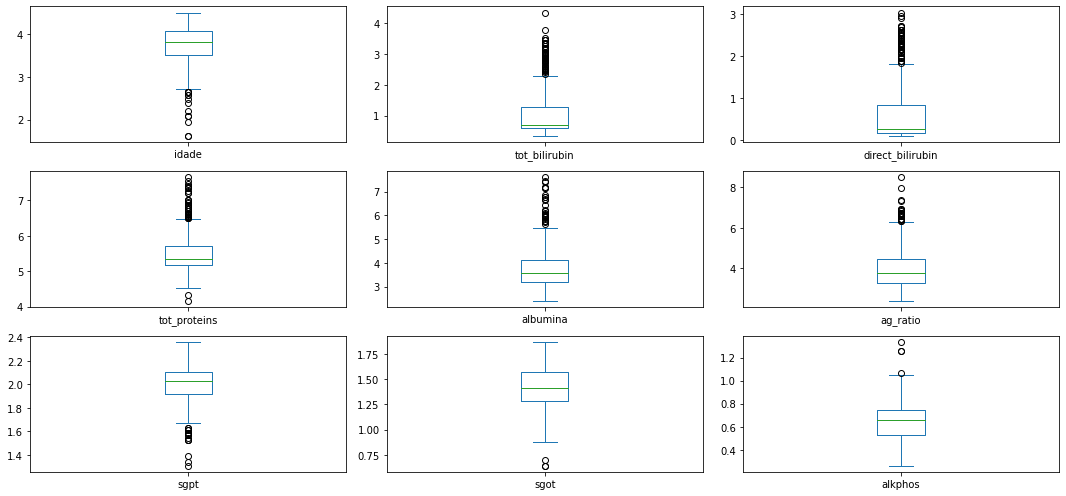

In [29]:
# Box Plots
log.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

### sqrt

In [30]:
# transform
sqrt = sqrtFunc(dataset)

# test
normalTest(0.05, sqrt)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0000
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0000
4,albumina,The Null Hypothesis can be rejected.,0.0000
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis can be rejected.,0.0000
7,sgot,The Null Hypothesis can be rejected.,0.0007
8,alkphos,The Null Hypothesis can be rejected.,0.0003


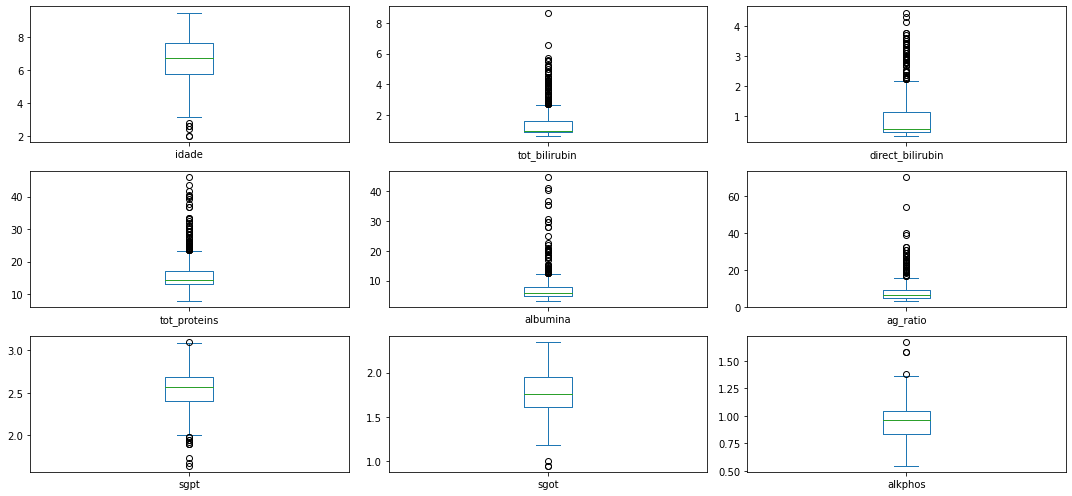

In [31]:
# Box Plots
sqrt.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

### Reciprocal

In [32]:
# transform
reciprocal = reciprocalFunc(dataset)

# test
normalTest(0.05, reciprocal)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0
3,tot_proteins,The Null Hypothesis can be rejected.,0.0
4,albumina,The Null Hypothesis can be rejected.,0.0
5,ag_ratio,The Null Hypothesis can be rejected.,0.0
6,sgpt,The Null Hypothesis can be rejected.,0.0
7,sgot,The Null Hypothesis can be rejected.,0.0
8,alkphos,The Null Hypothesis can be rejected.,0.0


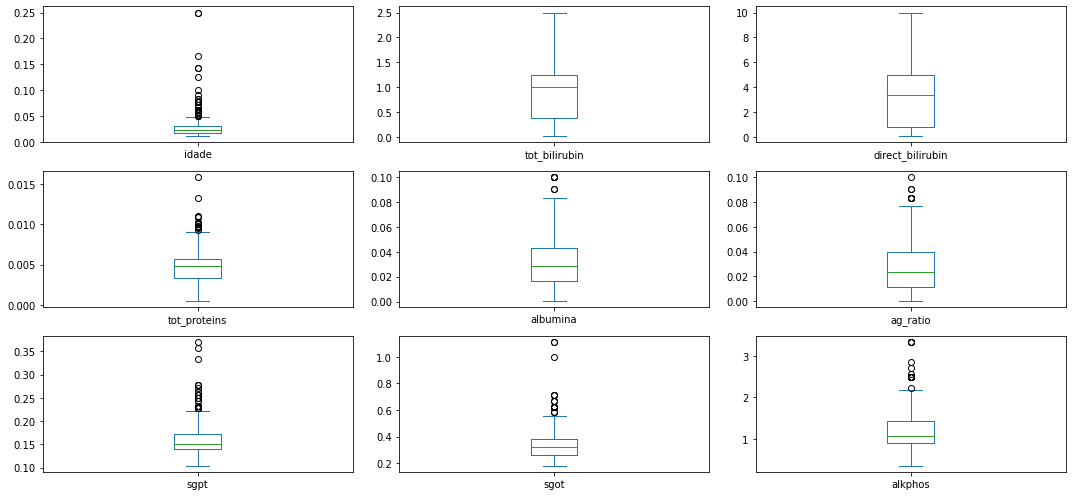

In [33]:
# Box Plots
reciprocal.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

### Box Cox

In [34]:
# transform
bxc = bxcFunc(dataset)

# test
normalTest(0.05, bcx)

,Name,Test,p-value
0,tot_proteins,The Null Hypothesis can be rejected.,0.0008


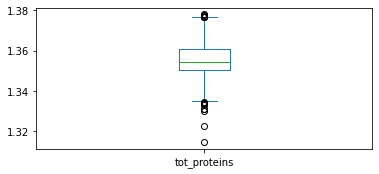

In [35]:
# Box Plots
bcx.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

### Yeo-Johnson

In [36]:
# Yeo-Johnson
yf = yeoJohnFunc(dataset)

# test
normalTest(0.05, yf)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0011
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0009
4,albumina,The Null Hypothesis cannot be rejected.,0.0926
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis cannot be rejected.,0.9846
7,sgot,The Null Hypothesis cannot be rejected.,0.0591
8,alkphos,The Null Hypothesis cannot be rejected.,0.2175


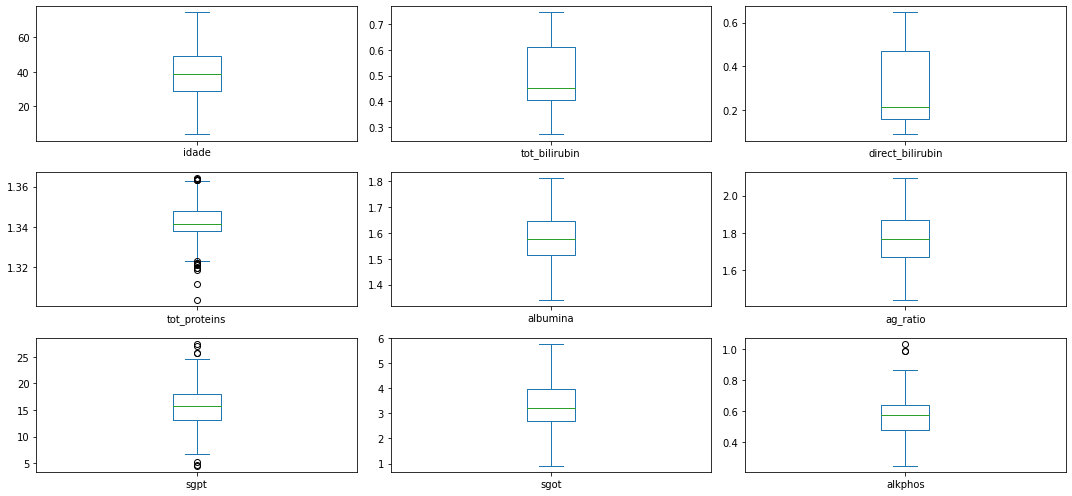

In [37]:
# Box Plots
yf.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

In this case, the Box-Cox and Yeo-Johnson transformations presented the best results. In the original dataset, we had only one normally distributed variable at a significance level of 5%, with the transformations we have 4 variables. The other variables are closer to normality.

___

# Outliers

Another way to deal with non-normality is to treat outliers in some way. In these cases, it is necessary to take into account the type of problem being dealt with. In cases of anomaly detection, for example, outlier treatment requires greater care, as it is precisely in them that we are interested.

In [38]:
# Remove outliers
def removeOutliers(dataset):
    outlier_free_list = []
    filtered_data = []

    for col in dataset.columns:

        Q3 = np.quantile(dataset[col], 0.75)
        Q1 = np.quantile(dataset[col], 0.25)
        IQR = Q3 - Q1   

        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        outlier_free = [x for x in dataset[col] if ((x > lower_range) & (x < upper_range))]
        filtered_data.append(outlier_free)
    filtered_df = pd.DataFrame(filtered_data).T.dropna()
    filtered_df.columns = list(dataset.columns)
        
    return filtered_df   

In [39]:
free_outlier = removeOutliers(dataset)
free_outlier

,idade,tot_bilirubin,direct_bilirubin,tot_proteins,albumina,ag_ratio,sgpt,sgot,alkphos
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,1.0,0.4,182.0,64.0,100.0,7.5,3.2,0.74
2,62.0,3.9,2.0,195.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.8,0.7,208.0,14.0,20.0,6.8,3.4,1.00
4,72.0,0.9,0.2,154.0,27.0,59.0,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
490,25.0,0.5,1.2,390.0,22.0,138.0,5.9,3.9,0.70
491,32.0,0.6,0.3,356.0,22.0,83.0,4.9,3.0,1.20
492,24.0,0.8,1.6,315.0,20.0,34.0,8.1,4.8,0.40
493,67.0,1.3,0.1,388.0,91.0,143.0,5.5,3.0,0.90


> ### Statistical test

In [40]:
# No outlier
normalTest(0.05, free_outlier)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0000
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0000
4,albumina,The Null Hypothesis can be rejected.,0.0000
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis can be rejected.,0.0281
7,sgot,The Null Hypothesis cannot be rejected.,0.0726
8,alkphos,The Null Hypothesis cannot be rejected.,0.0597


> ### Visual test

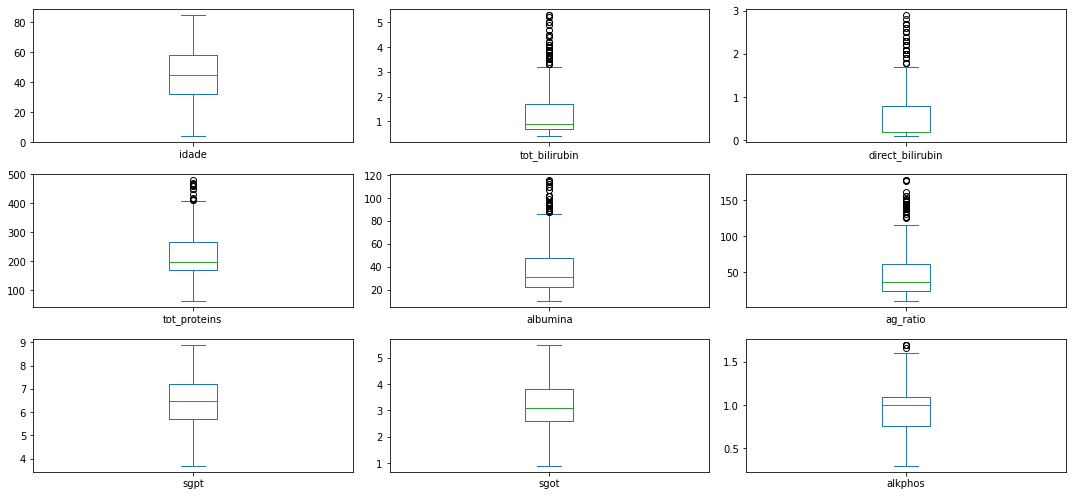

In [41]:
# Box Plots
free_outlier.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

## Apply the transformation to the data free of outliers

### Log

In [42]:
# log transform
log_freeoutlier = logFunc(dataset)

# test
normalTest(0.05, log_freeoutlier)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0000
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0000
4,albumina,The Null Hypothesis can be rejected.,0.0000
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis can be rejected.,0.0000
7,sgot,The Null Hypothesis can be rejected.,0.0000
8,alkphos,The Null Hypothesis can be rejected.,0.0011


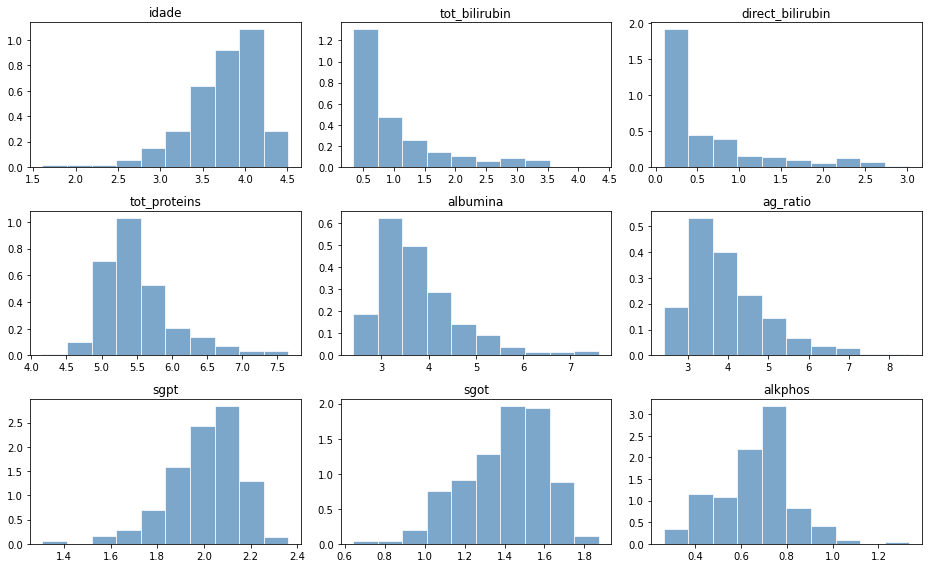

In [43]:
# Histogram
log_freeoutlier.hist(grid = False, layout = (3,3), figsize = (13, 8), density = True, color = 'steelblue', alpha=0.7, ec = 'white')

plt.tight_layout()
plt.show()

### sqrt

In [44]:
# sqrt transform
sqrt_freeoutlier = sqrtFunc(dataset)

# test
normalTest(0.05, sqrt_freeoutlier)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0000
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0000
4,albumina,The Null Hypothesis can be rejected.,0.0000
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis can be rejected.,0.0000
7,sgot,The Null Hypothesis can be rejected.,0.0007
8,alkphos,The Null Hypothesis can be rejected.,0.0003


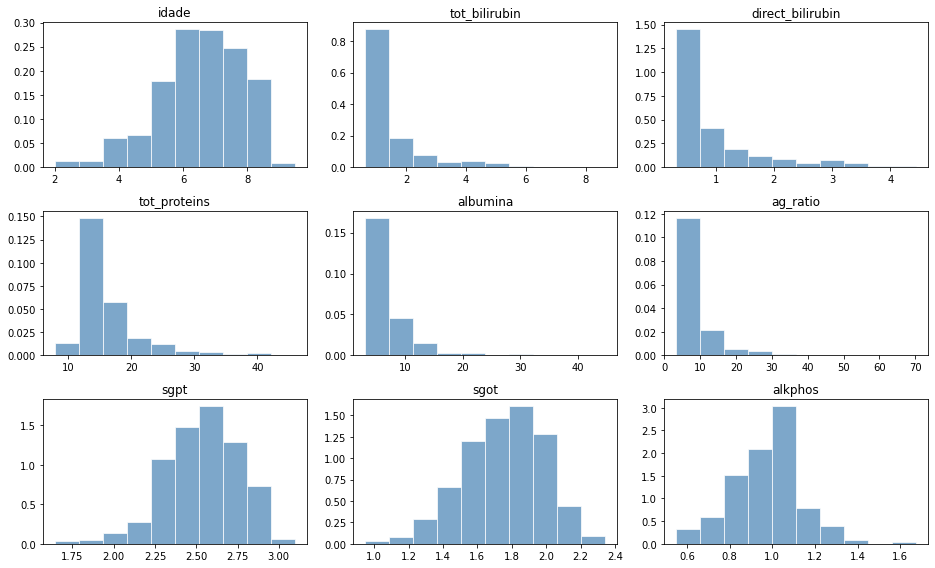

In [45]:
# Histograma Univariado
sqrt.hist(grid = False, layout = (3,3), figsize = (13, 8), density = True, color = 'steelblue', alpha=0.7, ec = 'white')

plt.tight_layout()
plt.show()

### Reciprocal

In [46]:
# reciprocal transform
rec_freeoutlier = reciprocalFunc(dataset)

# test
normalTest(0.05, rec_freeoutlier)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0
3,tot_proteins,The Null Hypothesis can be rejected.,0.0
4,albumina,The Null Hypothesis can be rejected.,0.0
5,ag_ratio,The Null Hypothesis can be rejected.,0.0
6,sgpt,The Null Hypothesis can be rejected.,0.0
7,sgot,The Null Hypothesis can be rejected.,0.0
8,alkphos,The Null Hypothesis can be rejected.,0.0


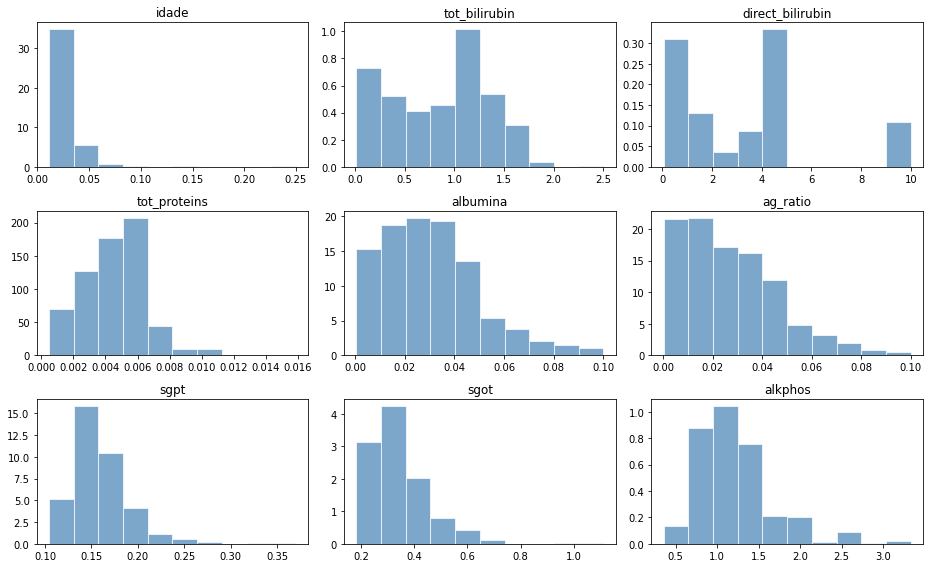

In [47]:
# Histogram
rec_freeoutlier.hist(grid = False, layout = (3,3), figsize = (13, 8), density = True, color = 'steelblue', alpha=0.7, ec = 'white')

plt.tight_layout()
plt.show()

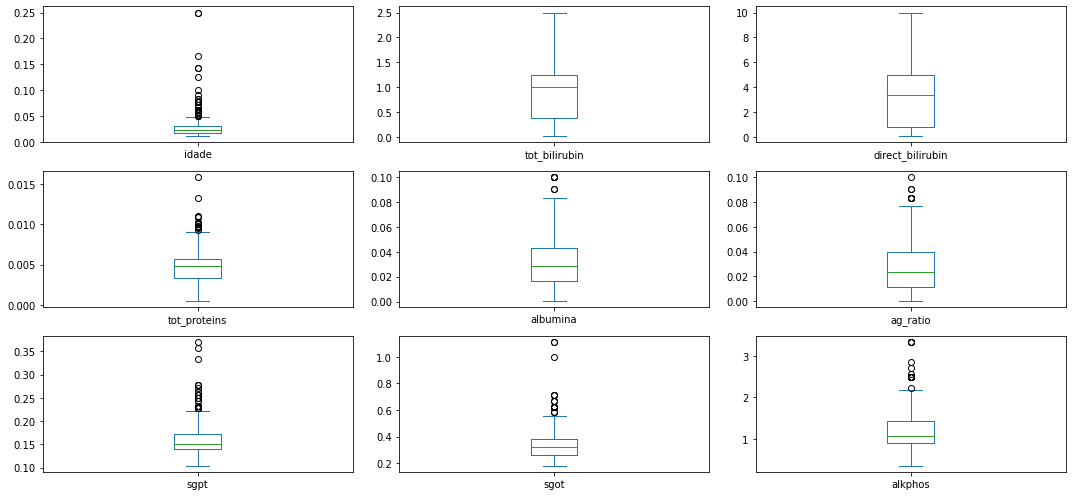

In [48]:
# Box Plots
rec_freeoutlier.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

### Box-Cox

In [49]:
# bxc transform
bxc_freeoutlier = bxcFunc(dataset)

# test
normalTest(0.05, bxc_freeoutlier)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0011
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0008
4,albumina,The Null Hypothesis cannot be rejected.,0.1739
5,ag_ratio,The Null Hypothesis can be rejected.,0.0001
6,sgpt,The Null Hypothesis cannot be rejected.,0.9914
7,sgot,The Null Hypothesis cannot be rejected.,0.0584
8,alkphos,The Null Hypothesis can be rejected.,0.0361


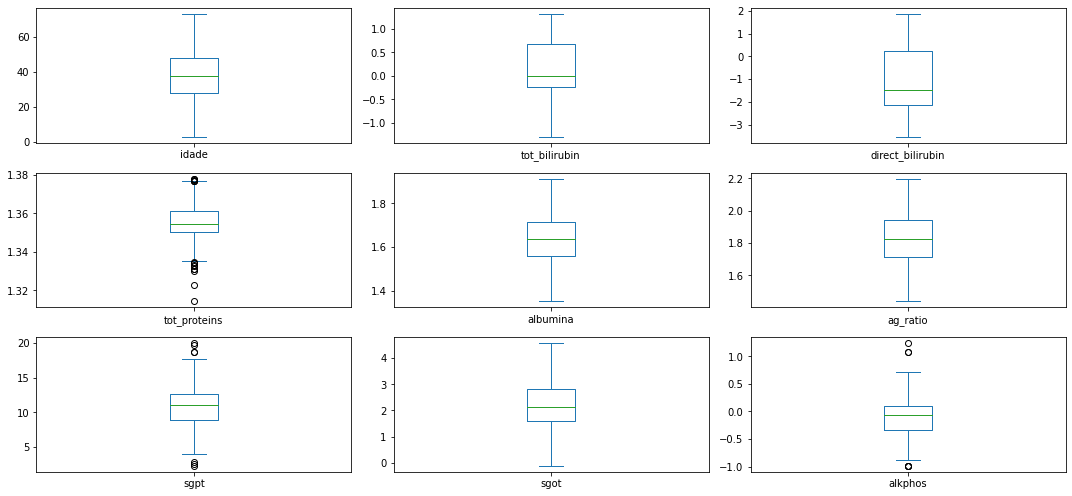

In [50]:
# Box Plots
bxc_freeoutlier.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

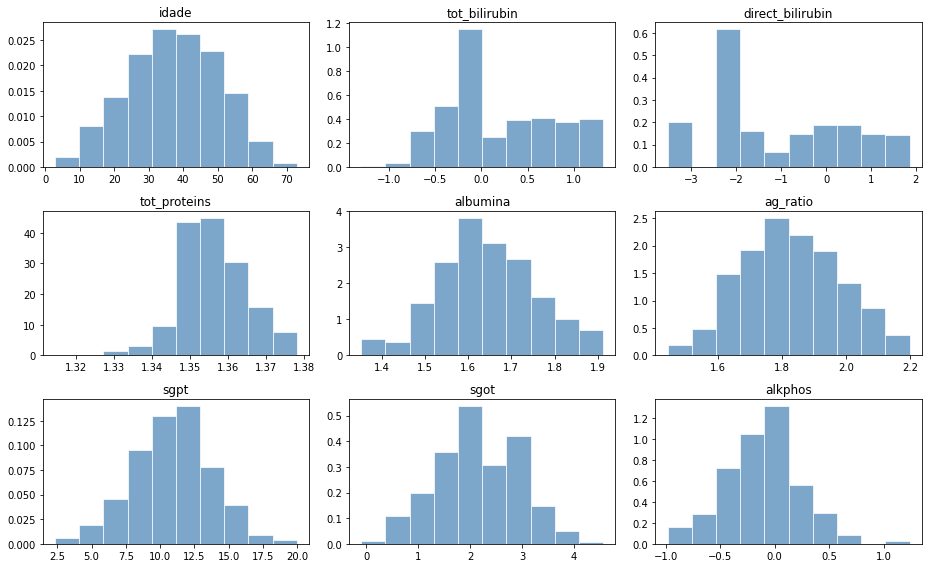

In [51]:
# Histogram
bxc_freeoutlier.hist(grid = False, layout = (3,3), figsize = (13, 8), density = True, color = 'steelblue', alpha=0.7, ec = 'white')

plt.tight_layout()
plt.show()

### Yeo-Johnson

In [52]:
# yeoJohn transform
yf_freeoutlier = yeoJohnFunc(dataset)

# test
normalTest(0.05, yf_freeoutlier)

,Name,Test,p-value
0,idade,The Null Hypothesis can be rejected.,0.0011
1,tot_bilirubin,The Null Hypothesis can be rejected.,0.0000
2,direct_bilirubin,The Null Hypothesis can be rejected.,0.0000
3,tot_proteins,The Null Hypothesis can be rejected.,0.0009
4,albumina,The Null Hypothesis cannot be rejected.,0.0926
5,ag_ratio,The Null Hypothesis can be rejected.,0.0000
6,sgpt,The Null Hypothesis cannot be rejected.,0.9846
7,sgot,The Null Hypothesis cannot be rejected.,0.0591
8,alkphos,The Null Hypothesis cannot be rejected.,0.2175


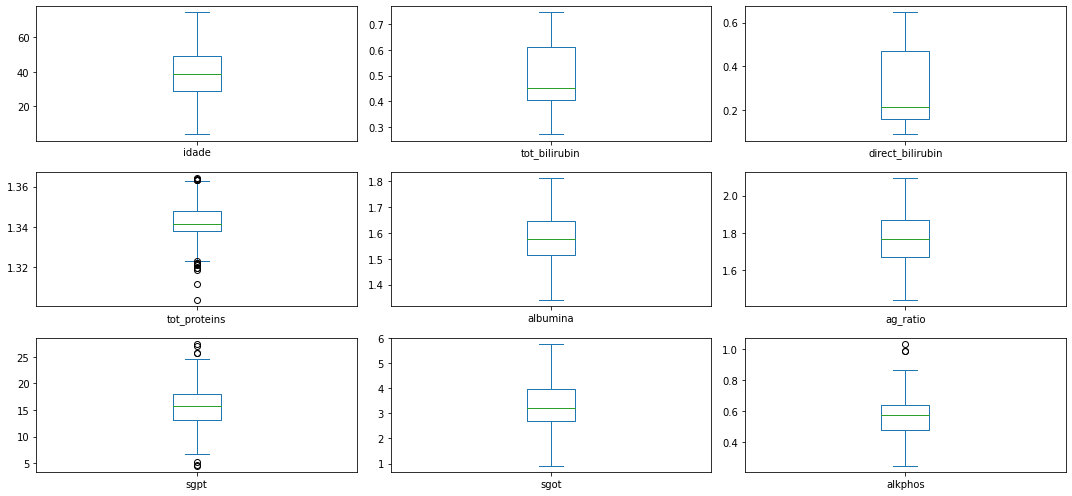

In [53]:
# Box Plots
yf_freeoutlier.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,7))

plt.tight_layout()
plt.show()

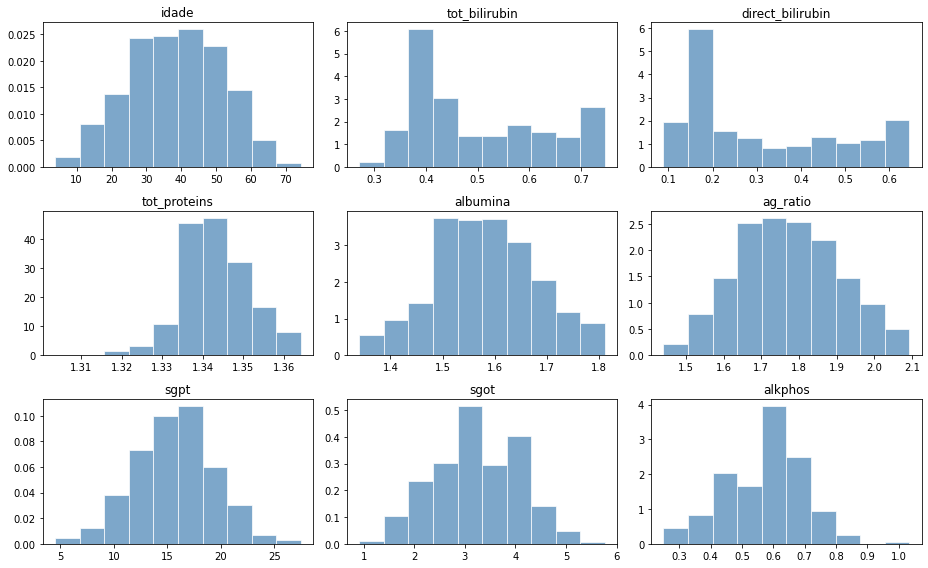

In [54]:
# Histogram
yf_freeoutlier.hist(grid = False, layout = (3,3), figsize = (13, 8), density = True, color = 'steelblue', alpha=0.7, ec = 'white')

plt.tight_layout()
plt.show()

The Box-Cox and Yeo-Johnson transformations applied after outlier treatment produced good results for most variables.

The treatment and transformations that can be used depend on the problem at hand, and the results depend on the data itself, so it is necessary to test different transformations.

Regarding the application of these transformations to data used in machine learning models, we can verify if the algorithm used assumes the hypothesis of normality of the data. If it does't assume it, then these transformations may not be necessary.

___